In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing # preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from matplotlib import cm # for visualization dataset before classification
from pandas.plotting import scatter_matrix # for visualization dataset before classification
import seaborn as sns # for visualization
import matplotlib.pyplot as plt
import mpl_toolkits
import mpl_toolkits.mplot3d 

from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

from sklearn.ensemble import RandomForestClassifier # from random forest

In [2]:
#importing data
trainset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')

In [3]:
#make a dataframe from datsets
train=pd.DataFrame(trainset)
test=pd.DataFrame(testset)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

In [5]:
#definig number of members of family 
train['familyMem']=train['SibSp']+train['Parch']
test['familyMem']=test['SibSp']+test['Parch']

In [6]:
# encoding sex and embarked
labelencoder=preprocessing.LabelEncoder()
train.Sex=labelencoder.fit_transform(train.Sex)
train.Embarked=labelencoder.fit_transform(train.Embarked)

# encoding testing set
test.Sex=labelencoder.fit_transform(test.Sex)
test.Embarked=labelencoder.fit_transform(test.Embarked)

In [7]:
# delet some column which are not important
columns=['Name','SibSp','Parch','Ticket']
train.drop(columns,axis=1,inplace=True)
test.drop(columns,axis=1,inplace=True)

In [8]:
# finding number of missing value

columns=train.columns
#print('the number of missing data in training set')
#print(train[columns].isnull().sum())
#print(len(train))
print("the percentage of missing data in training set")
print((train[columns].isnull().sum())*100/len(train))

the percentage of missing data in training set
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
familyMem       0.000000
dtype: float64


In [14]:
#finding missing values in testing set
print("the number of missing values in each column in test data")

print((test[test.columns].isnull().sum())*100/len(test))

the number of missing values in each column in test data
PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
familyMem       0.000000
dtype: float64


In [15]:
# delet one of the columns because of having more than 75% missing dataset
train.drop('Cabin',axis=1, inplace=True)
test.drop('Cabin',axis=1, inplace=True)



In [17]:
# imputing missing values in age column
train["Age"]=train["Age"].replace(np.nan, train["Age"].mean())

test["Age"]=test["Age"].replace(np.nan, test["Age"].mean())
test["Fare"]=test["Fare"].replace(np.nan,test["Fare"].mean())


#train.dropna(axis=0, inplace= True)
#test.dropna(axis=0, inplace= True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,familyMem
0,1,0,3,1,22.0,7.2500,2,1
1,2,1,1,0,38.0,71.2833,0,1
2,3,1,3,0,26.0,7.9250,2,0
3,4,1,1,0,35.0,53.1000,2,1
4,5,0,3,1,35.0,8.0500,2,0


# train_test_split

In [19]:
# defining X_train, X_test, y_train,y_test:
X= train.iloc[:,2:]
y=train.Survived

X_train,X_test, y_train, y_test= train_test_split(X,y)

# visualization of distribution of dataset

<AxesSubplot:xlabel='Survived', ylabel='Age'>

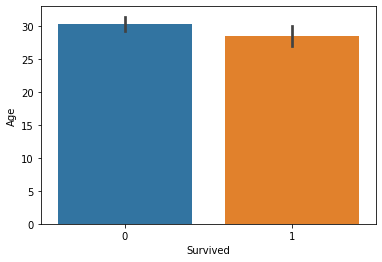

In [20]:
#ploting the distribution of age in traning set
sns.barplot(x='Survived',y='Age',data=train,)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

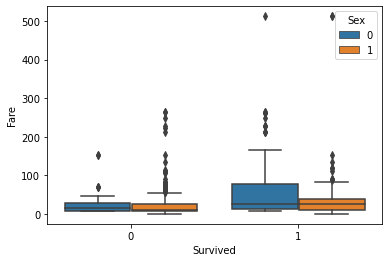

In [21]:
sns.boxplot(x='Survived',y='Fare',data=train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

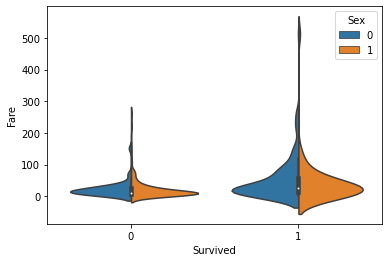

In [22]:
sns.violinplot(x='Survived',y='Fare',data=train, hue='Sex',split= True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

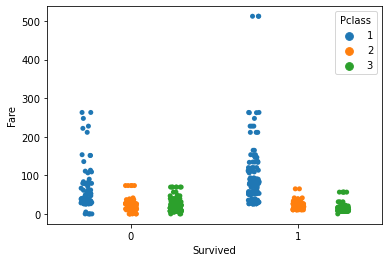

In [23]:
sns.stripplot(x='Survived',y='Fare',data=train ,jitter=True , hue= 'Pclass', split= True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size o

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

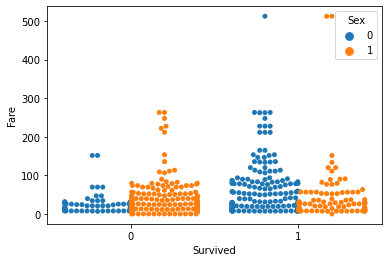

In [24]:
sns.swarmplot(x='Survived',y='Fare',data=train, hue='Sex',split= True)

# Random Forest

In [25]:
model_RF= RandomForestClassifier()

In [26]:
n_estimators= [int(i+1) for i in range((1000)+1)]

param_RF={'n_estimators': n_estimators}

In [27]:
random_RF=RandomizedSearchCV(model_RF,param_RF,verbose=3 ,return_train_score=True )

In [28]:
random_RF.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...............................n_estimators=695; total time=   2.3s
[CV 2/5] END ...............................n_estimators=695; total time=   2.2s
[CV 3/5] END ...............................n_estimators=695; total time=   2.2s
[CV 4/5] END ...............................n_estimators=695; total time=   2.2s
[CV 5/5] END ...............................n_estimators=695; total time=   2.1s
[CV 1/5] END ...............................n_estimators=150; total time=   0.4s
[CV 2/5] END ...............................n_estimators=150; total time=   0.4s
[CV 3/5] END ...............................n_estimators=150; total time=   0.4s
[CV 4/5] END ...............................n_estimators=150; total time=   0.4s
[CV 5/5] END ...............................n_estimators=150; total time=   0.4s
[CV 1/5] END ...............................n_estimators=722; total time=   2.1s
[CV 2/5] END ...............................n_es

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   return_train_score=True, verbose=3)

In [29]:
random_RF.best_score_

0.805465155425878

In [30]:
random_RF.best_params_

{'n_estimators': 150}

In [31]:
RM_prediction=random_RF.predict(X_test)

In [34]:
print(confusion_matrix(y_test,RM_prediction))
print('\n')
print(classification_report(y_test,RM_prediction))
print('\n')
print(accuracy_score(y_test,RM_prediction))

[[115  20]
 [ 26  62]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       135
           1       0.76      0.70      0.73        88

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



0.7937219730941704


In [39]:
test_data = test.drop("PassengerId", axis=1).copy()
randomforest_prediction=random_RF.predict(test_data)

submissionRF = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": randomforest_prediction
    })


In [40]:
submissionRF.to_csv('submission.csv', index=False)